### Scaling graph plot 

- Authors : Angelica , Kshitij

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
def plot_scaling_analysis(results_dir,out='plot_scaling_analysis.png'):
    # Load the JSON files
    json_files = list(Path(results_dir).glob("*.json"))

    data = []
    for file in json_files:
        with open(file) as f:
            data.append(json.load(f))

    df = pd.DataFrame(data)
    df['total_time_min'] = df['total_time_sec'] / 60

    # List to store computed speed-up values
    speedup_list = []

    for fraction in df['sample_fraction'].unique():
        # Subset for the current dataset fraction
        subset = df[df['sample_fraction'] == fraction]

        # Extract T(1): execution time with 1 executor
        t1 = subset[subset['num_executors'] == 1]['total_time_min']

        t1 = t1.iloc[0]

        # Compute speed-up for all runs in this fraction
        for _, row in subset.iterrows():
            speedup_list.append({
                'sample_fraction': fraction,
                'num_executors': row['num_executors'],
                'speedup': t1 / row['total_time_min']  # T(1) / T(n)
            })

    # Create DataFrame with computed speed-up values
    df_speedup = pd.DataFrame(speedup_list)

    #Plooting the speed up curves
    fig, ax = plt.subplots(figsize=(10, 6))

    for fraction in sorted(df_speedup['sample_fraction'].unique()):
        #sorting by number of executors
        subset = df_speedup[df_speedup['sample_fraction'] == fraction].sort_values('num_executors', ascending=True)

        ax.plot(subset['num_executors'], subset['speedup'], 
                marker='o', linewidth=2, markersize=8, 
                label=f'Fraction: {fraction}')

    #plot labels and title
    ax.set_xlabel('Number of Executors', fontsize=12)
    ax.set_ylabel('Speed-up T(1)/T(n)', fontsize=12)
    ax.set_title('Speed-up Curve for Cluster Scaling\n(7GB Memory, 2 Cores per Executor)', 
                    fontsize=14, weight='bold')
    ax.legend(title='Data Fraction', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.invert_xaxis()

    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    return df_speedup

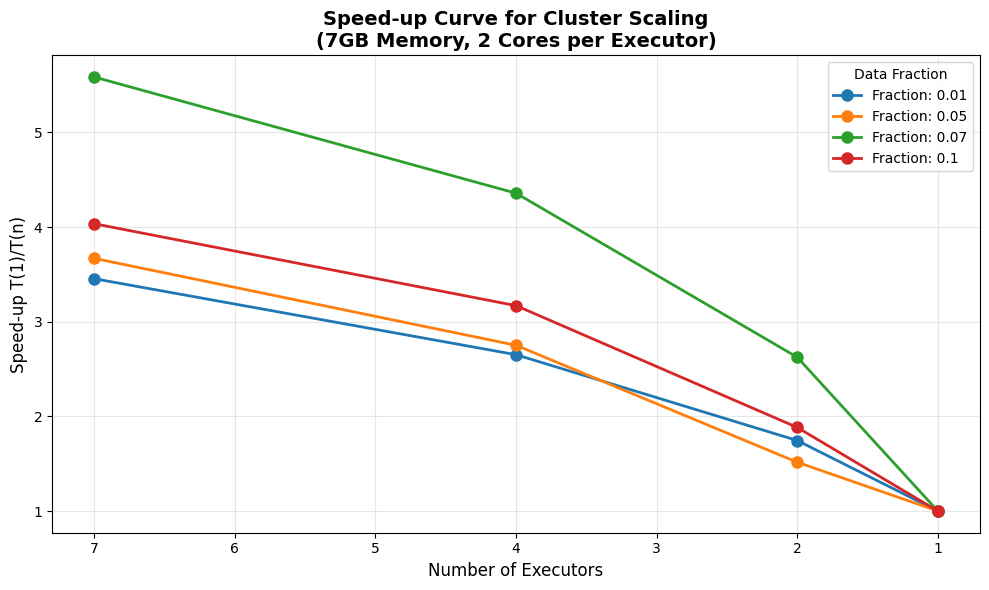

,sample_fraction,num_executors,speedup
0,0.01,1,1.000000
1,0.01,4,2.651307
2,0.01,7,3.453696
3,0.01,2,1.744832
4,0.10,2,1.883107
5,0.10,4,3.169326
6,0.10,1,1.000000
7,0.10,7,4.034414
8,0.05,7,3.668758
9,0.05,2,1.515291


In [7]:
results_dir_local = Path("../results/local/experiment-1-fixed-tree/")
plot_scaling_analysis(results_dir_local, out='graphs/scaling_analysis_local.png')